## Importing Packages and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import scipy.stats as stats

sns.set(color_codes=True)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Importing Dataset to Jupyter Notebooks

In [189]:
DataSet = pd.read_csv("D:\\McCombs Data Analytics Course\\Jupyter Notebook Files\\Proj 4 - Supervised Learning (Classification)\\Loan_Modelling.csv")
Data = pd.read_csv("D:\\McCombs Data Analytics Course\\Jupyter Notebook Files\\Proj 4 - Supervised Learning (Classification)\\Loan_Modelling.csv")

## Problem Definition
### PERSONAL LOAN CAMPAIGN MODEL

<u><b> OBJECTIVE </b></u>
- Explore and visualize the dataset.<br>
- Data Preprocessing. <br>
- Build a Logistic regression model to identify the potential customers who have a higher probability of purchasing the loan, the variables are most significant and which segment of customers should be targeted more.<br>
- Testing of Assumptions and Model Performance Evaluation of Logistic Regression Model. <br>
- Building a Decision Tree Model. <br>
- Testing of Assumptions and Model Performance Evaluation of Decision Tree Model. <br>
- Generate a set of insights and recommendations by comparing the models. <br>
- EDA on incorrectly predicted data <br>

## Basic Information on the Attributes in the Initial DataSet

<u><b> TYPES OF ATTRIBUTES </b></u>

In [5]:
DataSet.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

There are 13 attributes of type INTEGER. <br>
There is 1 attributes of type FLOAT. <br>
TOTAL : 14 Attributes. <br>

<u><b> ANY MISSING VALUES IN THE DATASET? </b></u>

In [6]:
DataSet.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

There are <b> NO </b> missing values in the DataSet

<u><b> SUMMARIZED DATASET </b></u>

In [8]:
DataSet.describe(include="all")

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


##### Observations
- The DataSet contains information on 5000 people.<br>
- Age ranges from 23 to 67 with the average being 45. <br>
- Experience ranges from -3 to 43 years with the average being 20 years. <br>
- Income ranges from 8,000 to 224,000 dollars with the average being 64,000 dollars. <br>
- ZIP Code highlights the locations of the people. <br>
- Family ranges from 1 to 4 members with the average being 2. <br>
- CCAvg ranges from 0 to 10,000 dollars with the average around 1,500 dollars <br>
- Education ranges from 1 to 3 in levels (1: Undergrad; 2: Graduate;3: Advanced/Professional) with the average around 2 (Graduate) <br>
- Mortgage ranges from 0 to 635,000 dollars. <br>
- Age ranges from 23 to 67 with the average being 45. <br>
- Personal_Loan highlights whether customer accepted the personal loan offered in the last campaign? (0: NO, 1:YES)<b> MOST COMMONLY - NO </b><br>
- Securities_Account highlights whether the customer has securities account with the bank? (0: NO, 1:YES) <b> MOST COMMONLY - NO </b><br>
- CD_Account highlights whether the customer has a certificate of deposit (CD) account with the bank? (0: NO, 1:YES) <b>MOST COMMONLY - NO </b><br>
- Online highlights whether thecustomers use internet banking facilities? (0: NO, 1:YES)<b> MOST COMMONLY - YES</b><br>
- CreditCard highlights whether the customer uses a credit card issued by any other Bank (excluding All life Bank)? (0: NO, 1:YES) <b>MOST COMMONLY - NO</b><br>

<u><b> DIMENSIONS OF THE  DATASET (ROWS AND COLUMNS) </b></u>

In [9]:
DataSet.shape

(5000, 14)

There are 7253 rows and 14 columns

<u><b> CORRELATIONS BETWEEN ATTRIBUTES </b></u>

In [10]:
DataSet.corr()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.002240,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.030456,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.002240,-0.030530,-0.030456,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.007413,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


<u><b> SKEWNESS IN THE DATASET </b></u>

In [11]:
DataSet.skew()

ID                    0.000000
Age                  -0.029341
Experience           -0.026325
Income                0.841339
ZIPCode              -0.296165
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
Personal_Loan         2.743607
Securities_Account    2.588268
CD_Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

- Age, Experience, and Online has negative skew
- CCAvg, Mortgage, Personal_Loan, Securities_Account and CD_Account has a very high Positive Skew

## Data Pre-Processing I
<b> This part of Data Preprocessing is done to understand the DataSet better and for UNIVARIATE and BIVARIATE Exploratory Data Analysis. <br>Further Data Preprocessing will be done after EDA is complete. <br></b>

In [190]:
df = Data

#### STEP 1 : DROP UNNECESSARY COLUMNS
In this case; 
- <b>ID</b> and <b>ZIP CODE</b> column will not be used to make any deductions. Hence it shall be dropped. 


In [191]:
df.drop(['ID','ZIPCode'],axis=1, inplace=True)
df.shape

(5000, 12)

The Number of columns has now reduced to 12.

In [147]:
categorical=[col for col in df.columns if df[col].nunique()<=5]
continous=[col for col in df.columns if df[col].nunique()>5]
print("The Categorical Attributes are : ")
print(categorical)
print("The Numerical Attributes are : ")
print(continous)

The Categorical Attributes are : 
['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
The Numerical Attributes are : 
['Age', 'Income', 'CCAvg', 'Mortgage']


#### STEP 2 : PROCESSING COLUMNS
In this case;

<b>1) <u>Experience</u></b>
- 'Experience' column shows presence of negative entries (min=-3) which is wrong and needs to be handled appropriately.

In [20]:
Neg_Ent = df[df['Experience']<0].Experience.count()
Unique_Neg_Ent = df[df['Experience']<0].Experience.value_counts()
print(Neg_Ent)
print("---------------------")
print(Unique_Neg_Ent)

52
---------------------
-1    33
-2    15
-3     4
Name: Experience, dtype: int64


- There are 52 negative entries in the Experience column<br>
- There are 33 entries of -1, 15 entries of -2 and 4 entries of -3.

<b>Experience cannot have negative values. We can now take 2 ways:</b><br>
<i><b>1) Drop the column </b></i><br>
<i><b>2) Replace the negative values in the column with the the mean / median.</b></i><br>

Most commonly we prefer the SECOND OPTION as this ensures that dropping the column does not create any trouble in the model building phase as the negative (incorrect values) are a very small part of the attribute and the other data points can create a significant difference in the dataset. <br><br>
<b>BUT IN THIS CASE : </b><br>
On checking the <u>CORRELATION TABLE</u>, we notice that AGE and EXPERIENCE have very <u>HIGH POSTIVE CORRELATION</u> (0.994215 ~~ 1).<br> This means that both these attributes are strongly related and that the variables tend to change in unison. <u>This means the EXPERIENCE can be mirrored by the AGE attribute.</u><br><br>
<i>This is why I chose to DROP the EXPERINCE column rather than replace it with the median values as the it will be represented by the AGE column in the model causing no discrepancy on being dropped.</i>

In [192]:
df.drop(['Experience'],axis=1, inplace=True)
df.shape

(5000, 11)

The Number of columns has now reduced to 11.

<b>2) <u>Other Columns / Attributes</u></b>
- Remaining numeric columns seem to be fine and no data cleaning is required

## Univariate Analysis of Variables

<u><b> HISTOGRAM PLOT OF NUMERICAL VARIABLES TO SHOW DISTRIBUTION </b></u>

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Family'}>],
       [<AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Mortgage'}>],
       [<AxesSubplot:title={'center':'Personal_Loan'}>,
        <AxesSubplot:title={'center':'Securities_Account'}>,
        <AxesSubplot:title={'center':'CD_Account'}>],
       [<AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>, <AxesSubplot:>]],
      dtype=object)

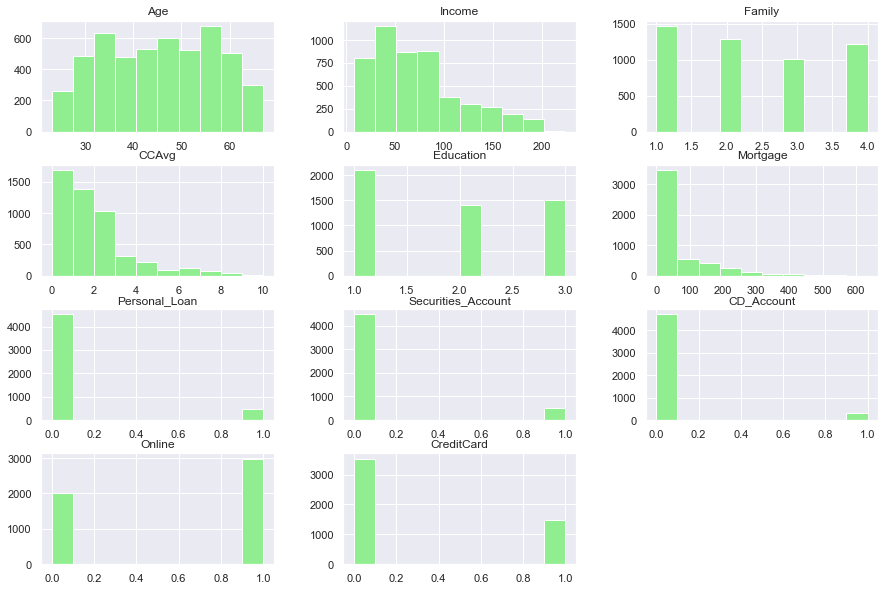

In [24]:
df.hist(figsize=(15,10), color = 'lightgreen')

Histogram Plots of the various numerical Attributes present in the given Dataset. It shows the frequency of each element within the attribute. <br>
##### Observations
- The high positive Skew in the attributes CCAvg, Mortgage, Personal_Loan, Securities_Account and CD_Account is clearly visible. <br>
- Negative Skew in Online can be seen.

<u><b> AGE DISTRIBUTION </b></u>

<AxesSubplot:xlabel='Age'>

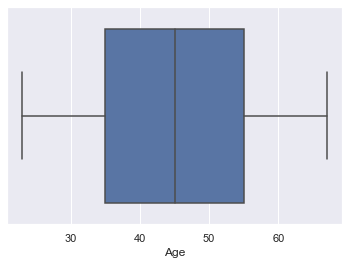

In [25]:
sns.boxplot(df['Age'])

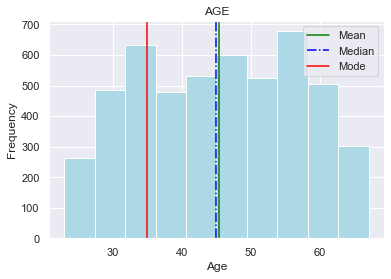

In [31]:
plt.hist(df['Age'], color = 'lightblue')
plt.axvline(df['Age'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['Age'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['Age'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("AGE")
plt.legend()

##### Observations
- Mode < Median < Mean
- There are NO outliers present.
- The box plot shows that it is very evenly distributed around the mean.
- The customer ages are in the range of 23 to 67 with average age as 45. 
- Quarter of the customer population is below 35.

<u><b> INCOME DISTRIBUTION </b></u>

<AxesSubplot:xlabel='Income'>

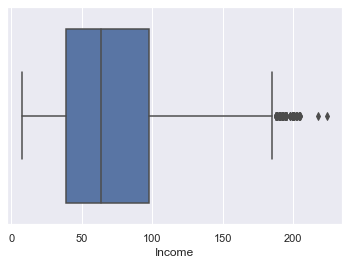

In [26]:
sns.boxplot(df['Income'])

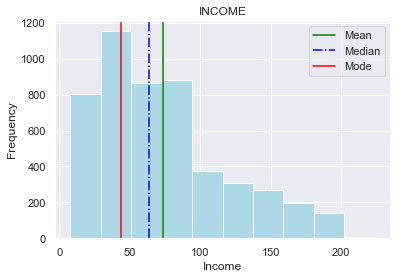

In [33]:
plt.hist(df['Income'], color = 'lightblue')
plt.axvline(df['Income'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['Income'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['Income'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title("INCOME")
plt.legend()

##### Observations
- Mode < Median < Mean 
- The boxplot shows a few outliers beyond the upper whisker.
- The histogram indicates that the distribution is right-skewed.

<u><b> CCAvg DISTRIBUTION </b></u>

<AxesSubplot:xlabel='CCAvg'>

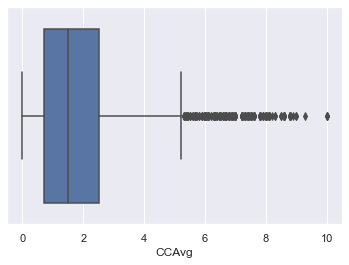

In [28]:
sns.boxplot(df['CCAvg'])

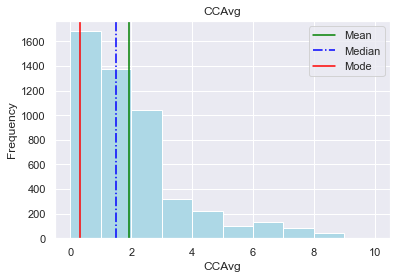

In [39]:
plt.hist(df['CCAvg'], color = 'lightblue')
plt.axvline(df['CCAvg'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['CCAvg'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['CCAvg'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('CCAvg')
plt.ylabel('Frequency')
plt.title("CCAvg")
plt.legend()

##### Observations
- Mode < Median < Mean
- Most customers spend 0 to 3000 dollars using credit cards in a month on an average.

<u><b> MORTGAGE DISTRIBUTION </b></u>

<AxesSubplot:xlabel='Mortgage'>

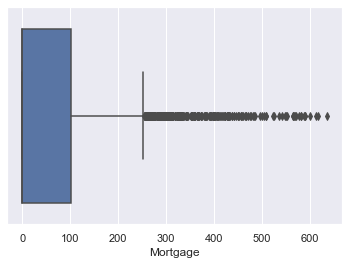

In [56]:
sns.boxplot(df['Mortgage'])

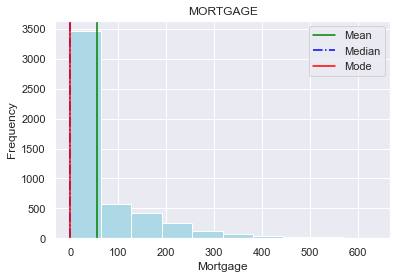

In [57]:
plt.hist(df['Mortgage'], color = 'lightblue')
plt.axvline(df['Mortgage'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['Mortgage'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['Mortgage'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Mortgage')
plt.ylabel('Frequency')
plt.title("MORTGAGE")
plt.legend()

##### Observations
- Mode = Median < Mean
- Most customers have a mortgage spanning 0 to 50,000 dollars
- High Postive Skew is visible. 

<u><b> FAMILY DISTRIBUTION </b></u>

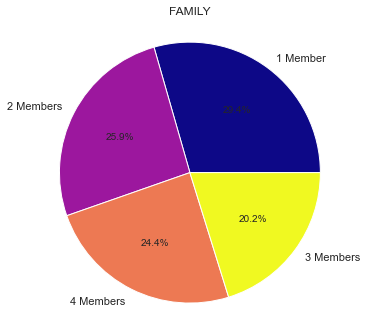

In [38]:
df1 = df['Family'].value_counts()
label1 = ['1 Member','2 Members','4 Members','3 Members']
df1.plot.pie(cmap = 'plasma', autopct='%2.1f%%',radius=1.5, labels=label1)
plt.title("FAMILY",y=1.2)
plt.show()

##### Observations
- The Data Set has more number of families with a size of 1 (29.4%) followed by families with size of 2 (25.9%), size of 4 (24.4%) and size of 3 (20.2%)
- Mostly evenly distributed. 


<u><b> EDUCATION DISTRIBUTION </b></u>

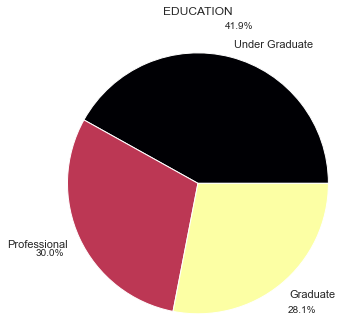

In [55]:
df2 = df['Education'].value_counts()
label2 = ['Under Graduate','Professional','Graduate']
df2.plot.pie(cmap = 'inferno', autopct='%2.1f%%',pctdistance = 1.25 ,radius=1.5, labels=label2)
plt.title("EDUCATION",y=1.25)
plt.show()

##### Observations
- Most of the customers are Under Graduates followed by Professionals and Graduates. 

<u><b> PERSONAL LOAN DISTRIBUTION </b></u>

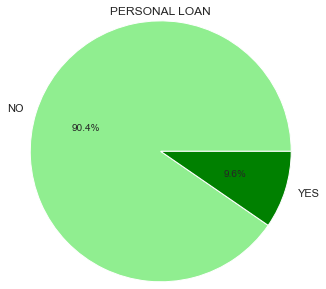

In [66]:
df3 = df['Personal_Loan'].value_counts()
label3 = ['NO','YES']
clr3 = ['lightgreen','green']
df3.plot.pie(cmap = 'inferno', autopct='%2.1f%%',radius=1.5, colors = clr3, labels = label3)
plt.title("PERSONAL LOAN",y=1.1)
plt.show()

##### Observations
- Most of the customers did NOT accept the personal loan offered in the last campaign.
- Less than 10% accepted.


<u><b> SECURITIES ACCOUNT DISTRIBUTION </b></u>

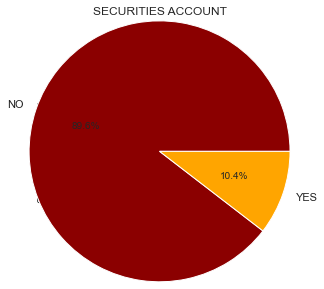

In [71]:
df4 = df['Securities_Account'].value_counts()
label4 = ['NO','YES']
clr4 = ['darkred','orange']
df4.plot.pie(autopct='%2.1f%%',radius=1.5, colors = clr4, labels = label4)
plt.title("SECURITIES ACCOUNT",y=1.1)
plt.show()

##### Observations
- Very small percentage of the dataset has a security account with the bank. (10.4%)


<u><b> CD ACCOUNT DISTRIBUTION </b></u>

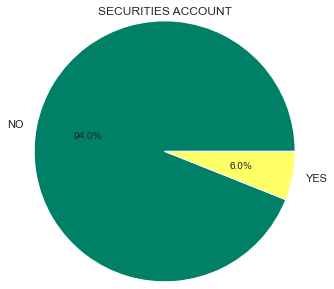

In [75]:
df5 = df['CD_Account'].value_counts()
label5 = ['NO','YES']
df5.plot.pie(cmap = "summer", autopct='%2.1f%%',radius=1.5, labels = label4)
plt.title("CD ACCOUNT",y=1.1)
plt.show()

##### Observations
- Very small percentage of the dataset has a Certificate of Deposit (CD) Account with the bank.(6%)


<u><b> ONLINE DISTRIBUTION </b></u>

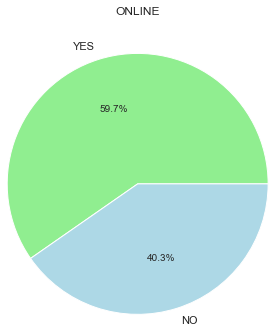

In [83]:
df6 = df['Online'].value_counts()
label6 = ['YES','NO']
clr6 = ['lightgreen','lightblue']
df6.plot.pie(cmap = 'inferno', autopct='%2.1f%%',radius=1.5, colors = clr6, labels = label6)
plt.title("ONLINE",y=1.25)
plt.show()

##### Observations
- Almost 60% of the dataset uses the internet banking facilities provided by the bank. 

<u><b> CREDIT CARD DISTRIBUTION </b></u>

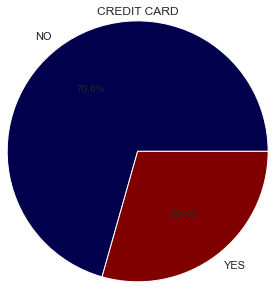

In [100]:
df7 = df['CreditCard'].value_counts()
label7 = ['NO','YES']
clr7 = ['lightpink','darkred']
df7.plot.pie(cmap = 'seismic', autopct='%2.1f%%',radius=1.5, labels = label7)
plt.title("CREDIT CARD",y=1.1)
plt.show()

##### Observations
- 70% of the dataset of customers does NOT use a credit card issued by any other Bank (excluding All life Bank)


## Bivariate and Multivariate Analysis of Variables

<u><b> HEAT MAP SHOWING CORRELATION BETWEEN VARIABLES </b></u>

<AxesSubplot:>

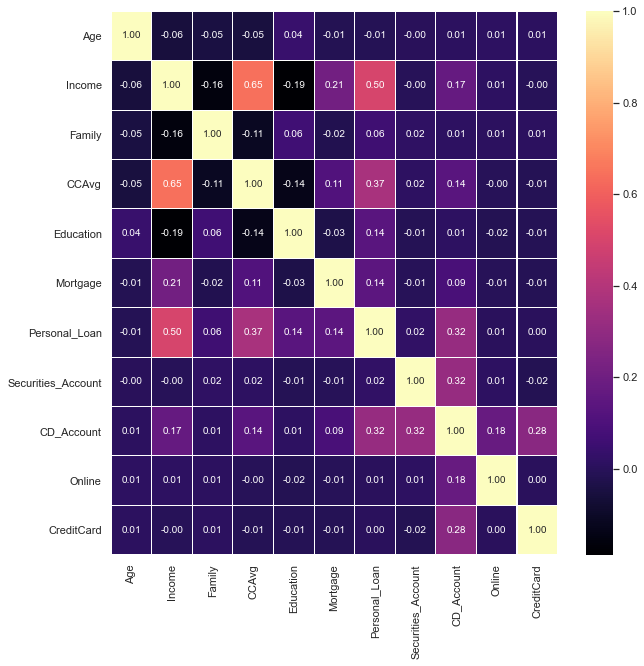

In [103]:
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), ax=ax, annot = True, linewidths = 0.05, fmt = '.2f', cmap="magma")

##### Observations
This Heat Map shows the correlation between the individual attributes. With this we can draw the following inferences : 
1) There is distributed correlation between the attributes of this dataset. <br>
2) The Highest Correlation is between 'Income' and 'CCAvg' with 0.65.<br>
3) The Lowest Correlation is between 'Income' and 'Education' with -0.19 (Negative).<br>
4) Since Personal_Loan is our target variable; the correlations of other columns with personal_loan; like age, experience, family, securities_account, online and creditcard have very low correlations.


<u><b> PAIRPLOT BETWEEN VARIABLES </b></u>

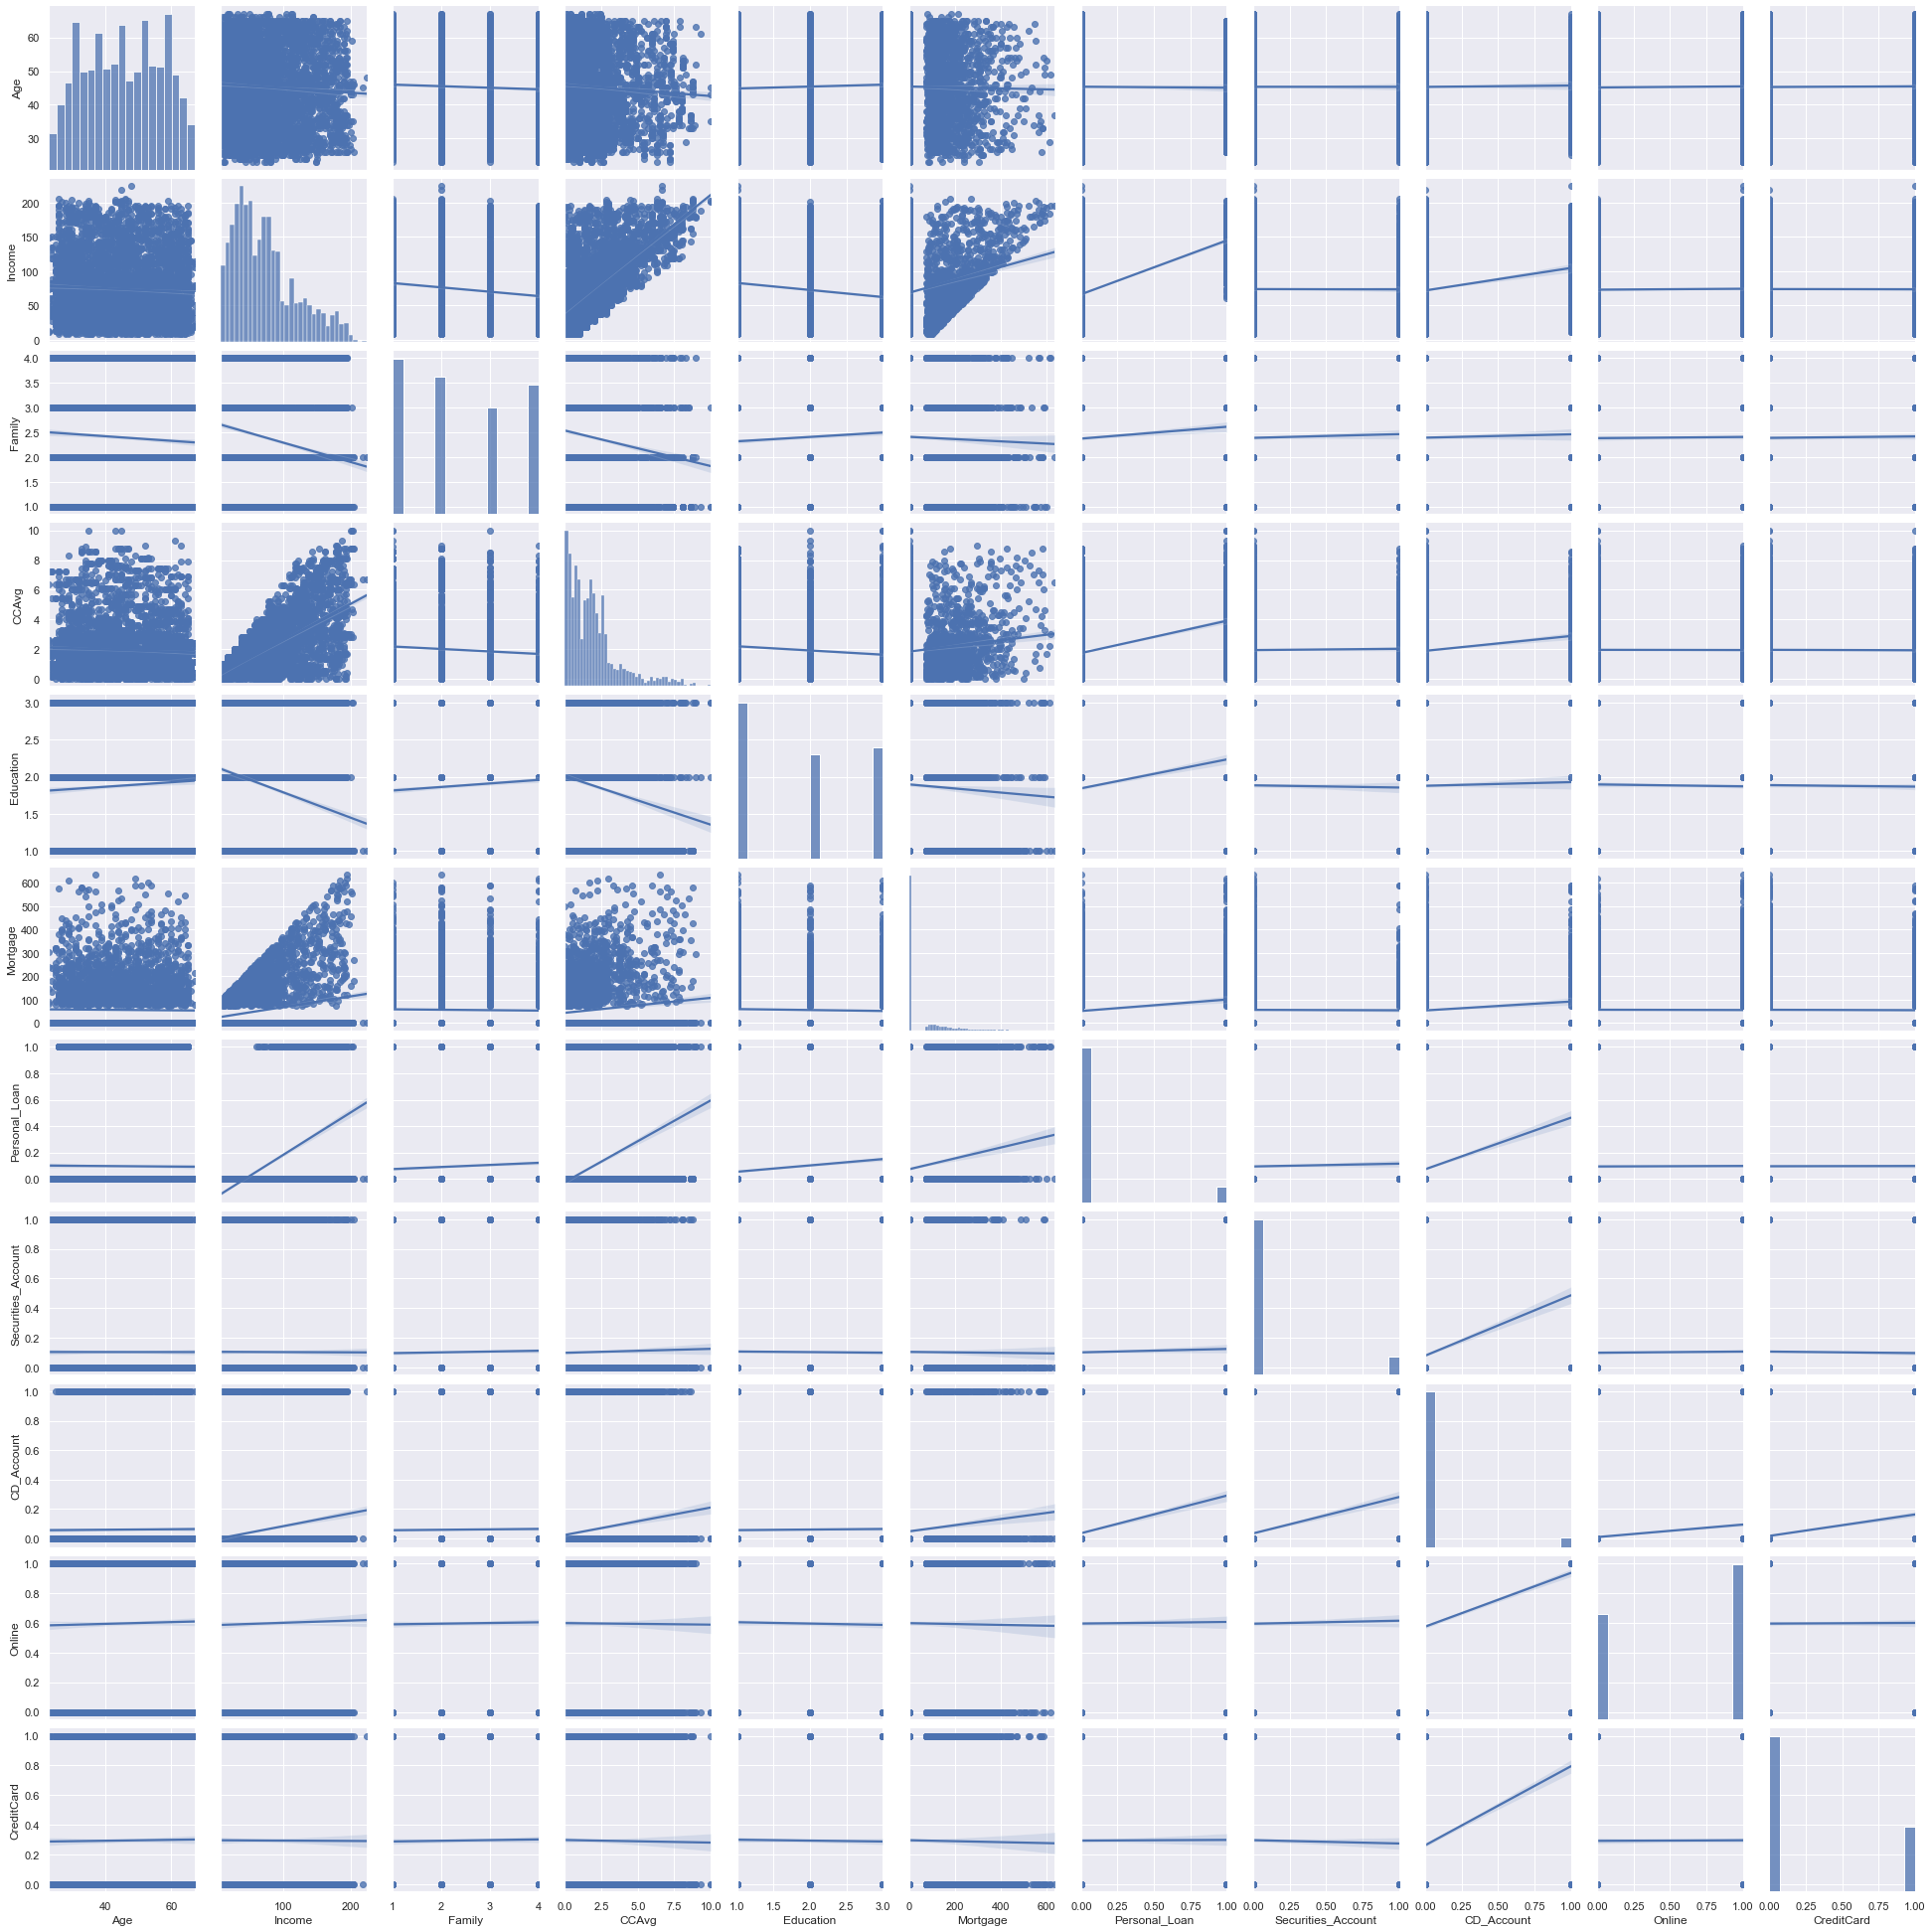

In [104]:
sns.pairplot(df,kind = 'reg')

##### Observations
Pairplot to show the relationship between the different variables. It is a more graphical representation of the Correlation Heat Map. 

<u><b> PERSONAL LOAN V/S AGE </b></u>

Text(0.5, 1.0, 'Age Distribution')

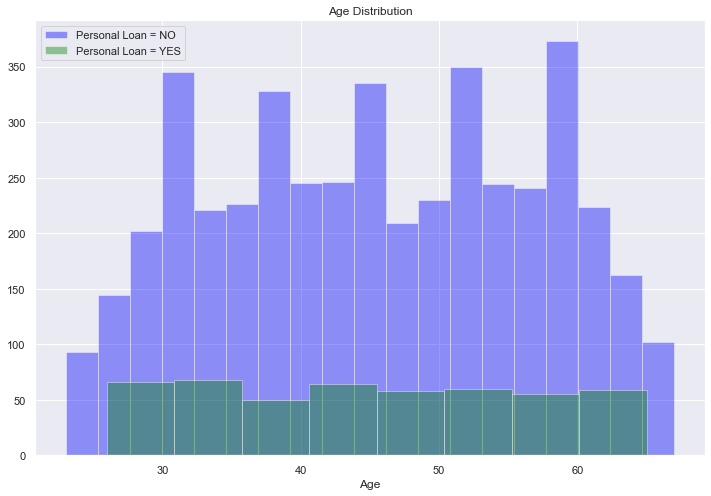

In [109]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['Personal_Loan'] == 0]['Age'],kde=False, color='blue', label='Personal Loan = NO')
sns.distplot(df[df['Personal_Loan'] == 1]['Age'],kde=False, color='green',label='Personal Loan = YES')
plt.legend()
plt.title("Age Distribution")

##### Observations
- Most of the customers lie in the age group of 30 to 60.
- Normally Distributed
- As Age increases, tendency to accept a personal loan has decreased. 

<u><b> PERSONAL LOAN V/S FAMILY </b></u>

<Figure size 720x432 with 0 Axes>

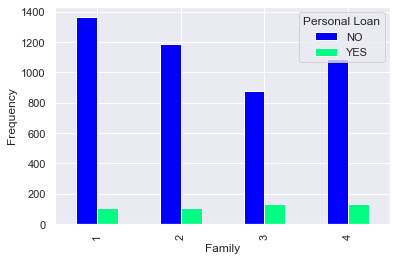

In [118]:
fig = plt.figure(figsize = (10,6))
tab1 = pd.crosstab(df['Family'],DataSet['Personal_Loan'])
tab1.plot.bar(cmap = "winter")
plt.ylabel("Frequency")
plt.legend(['NO', 'YES'],loc = "upper right", title="Personal Loan")

##### Observations
- Families of larger size prefer personal loans and have accepted it when offered in the last campaign.
- Number of Families that did not take the personal loan decrease with increase in family size with the exception of family size of 4 where there is a spike. 

<u><b> EDUCATION V/S FAMILY V/S INCOME </b></u>

[Text(0, 0, 'UnderGraduate'),
 Text(1, 0, 'Graduate'),
 Text(2, 0, 'Professional')]

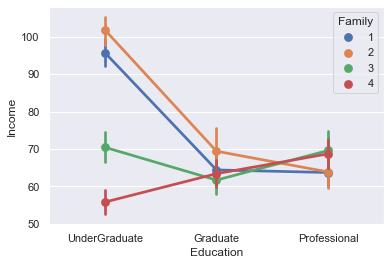

In [127]:
plot1 = sns.pointplot(df['Education'],df['Income'],hue = df['Family'])
labels = ['UnderGraduate', 'Graduate','Professional']
plot1.set_xticklabels(labels, horizontalalignment='center')

##### Observations
- UNDERGRADUATES : Family of 2 have highest income followed by family of 1, 3 and 4. 
- GRADUATES : Family of 2 has the highest income followed by family og 1,4 and 3.
- PROFESSIONALS : Family of 3 and 4 have the highest income followed by 1 and 2. <br>


There is no standard pattern across Family size and Education. For Family of 1 and 2, there is a constant decrease in income as education increases. For Family of 3, the income decreases and then increases as education level increases and for Family of 4 there is a constant increase in income as the level of education increases. 

<u><b> PERSONAL LOAN V/S CATEGORICAL VARIABLES </b></u>

In [161]:
cat1 = ['Family', 'Education', 'Securities_Account','CD_Account','Online','CreditCard']

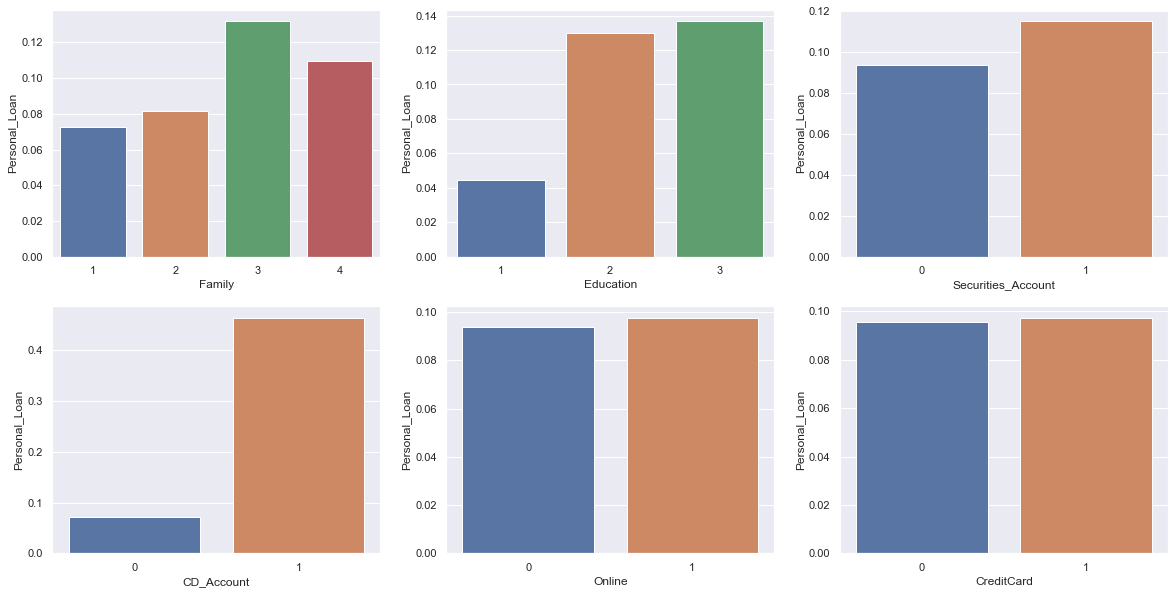

In [162]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(cat1):
    ax=fig.add_subplot(2,3,i+1)
    sns.barplot(x=col,y='Personal_Loan',data=df,ci=None)

##### Observations
- Customers with family size equal to 3 have preffered to accept the personal loan offered in the last campaign.
- Customers with Undergraduate degree have less chances of having Personal Loan as compared to other levels of Education. Higher the education level the more the customer is confident and open to opt for personal_loan.
- Customers with CD Account and Securities Account have more chances of having Personal Loan.
- Difference of usage of Online Facilities and Credit Cards supplied by other banks (YES OR NO) makes no difference to the acceptance of personal loan. 

<u><b> PERSONAL LOAN V/S NUMERICAL VARIABLES </b></u>

In [204]:
num1 = ['Age', 'Income', 'CCAvg','Mortgage']

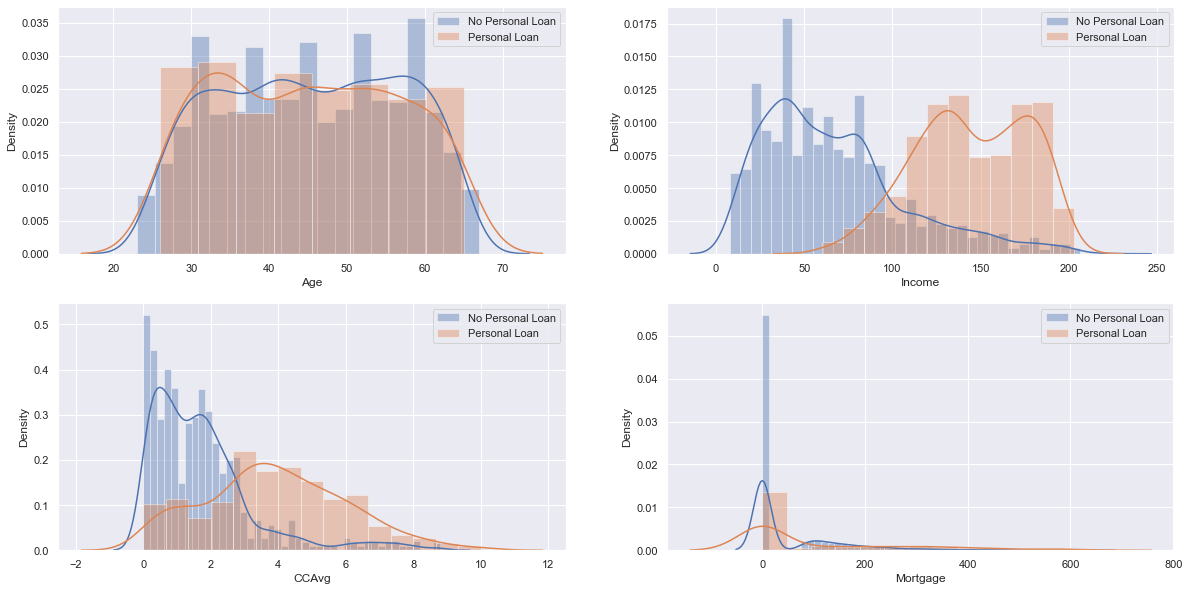

In [226]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(num1):
    ax=fig.add_subplot(2,2,i+1)
    ax1=sns.distplot(df[col][df['Personal_Loan']==0],hist=True,label='No Personal Loan')
    sns.distplot(df[col][df['Personal_Loan']==1],hist=True,ax=ax1,label='Personal Loan')
    ax.legend()

##### Observations
- Personal Loan doesn't show variations with Age.
- Higher Income points to a higher chance of haveing accepted a loan in the previous campaign.
- Higher Income shows that spending on credit cards also increases. Although the dataset is heavily concentrated to NO personal loans. 
- Customers with high Mortgage have accepted for Personal Loans.

<u><b> CCAvg V/S PERSONAL LOAN V/S INCOME </b></u>

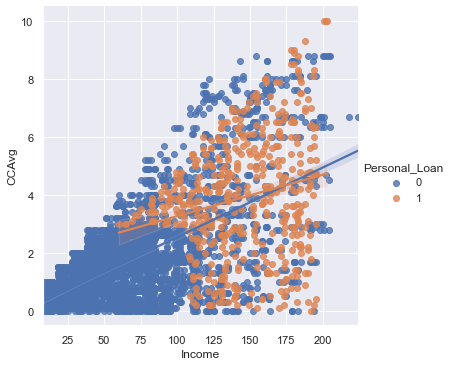

In [170]:
sns.lmplot('Income', 'CCAvg', data=df, hue='Personal_Loan', fit_reg=1)

##### Observations
- There is an increase in Average spending on credit cards per month as the Income increases.
- People opting for Personal Loans have a higher Income Set than those who don't and therefore have higher spending on their Credit Cards as well. 

<u><b> MORTGAGE V/S CREDIT CARD V/S INCOME </b></u>

<Figure size 720x720 with 0 Axes>

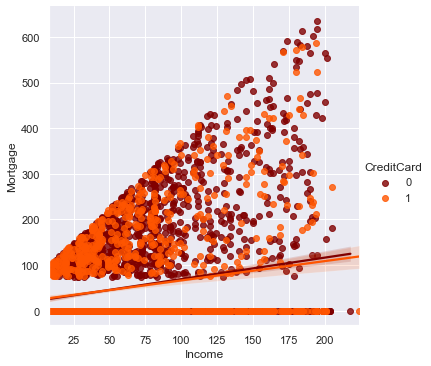

In [203]:
figure = plt.figure(figsize=(10,10))
sns.lmplot(x='Income',y='Mortgage',hue = 'CreditCard',data=df, palette="gist_heat")

##### Observations
- As Income increases Mortgage also increases.
- But it is also noticable that most people with lower income are on the lower side of mortgage. 
- Most of the dataset is concentrated to the lower mortgage and income. 
- As income increases, there is an increase in use of Credit Cards by other banks as well. But we can also notice that there is an increase in NO use of credit cards from other banks. This is mainly due to the imabalance in data favouring No credit cards. 

<u><b> MORTGAGE V/S FAMILY V/S SECURITIES ACCOUNT </b></u>

<AxesSubplot:xlabel='Family', ylabel='Mortgage'>

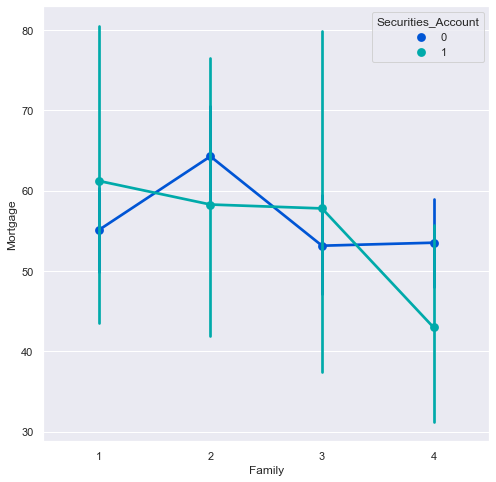

In [440]:
figure = plt.figure(figsize=(8,8))
sns.pointplot(y=df['Mortgage'],x=df['Family'],hue=df['Securities_Account'], palette = 'winter')


##### Observations
- SECURITY ACCOUNT : NO -  Family of 2 members have higher mortgage compared to families of other sizes who have relatively the same range of mortgage. 
- SECURITY ACCOUNT : YES - As Family Size increases, there is a general decrease in Mortgage amount.

<u><b> INCOME V/S FAMILY V/S CD ACCOUNT </b></u>

<AxesSubplot:xlabel='Family', ylabel='Income'>

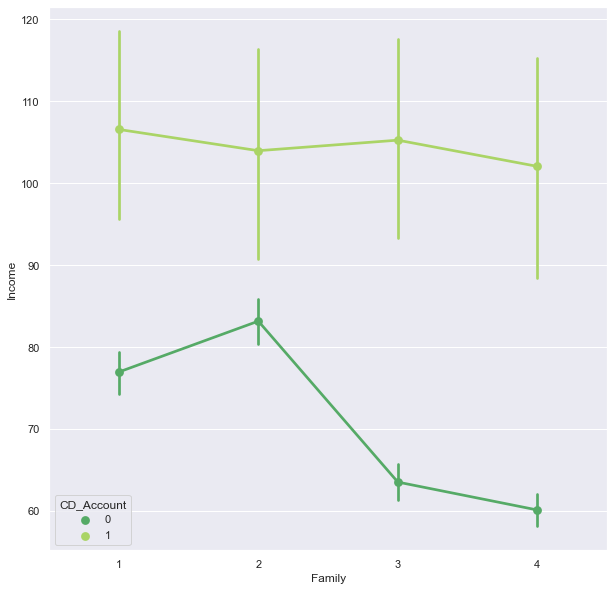

In [222]:
figure = plt.figure(figsize=(10,10))
sns.pointplot(y=df['Income'],x=df['Family'],hue=df['CD_Account'], palette = 'summer')


##### Observations
- Those with a higher income prefer to have a CD Account as compared to those with lower income.
- Amongst the lower income families, preference for CD Account is less. 2 member families have been noticed to have a higer income than families of other sizes with 3 and 4 member families with no CD account having very little income. 

### Key Insights based on EDA
- The customer ages are in the range of 23 to 67 with average age as 45. 
- Quarter of the customer population is below 35.
- Most customers spend 0 to 3000 dollars using credit cards in a month on an average.
- The Data Set has more number of families with a size of 1 (29.4%) followed by families with size of 2 (25.9%), size of 4 (24.4%) and size of 3 (20.2%)
- Most of the customers are Under Graduates followed by Professionals and Graduates.
- Most of the customers did NOT accept the personal loan offered in the last campaign.
- Less than 10% accepted.
- Very small percentage of the dataset has a security account with the bank. (10.4%)
- Very small percentage of the dataset has a Certificate of Deposit (CD) Account with the bank.(6%)
- Almost 60% of the dataset uses the internet banking facilities provided by the bank.
- 70% of the dataset of customers does NOT use a credit card issued by any other Bank (excluding All life Bank)
- Most of the customers lie in the age group of 30 to 60.
- As Age increases, tendency to accept a personal loan has decreased.
- Families of larger size prefer personal loans and have accepted it when offered in the last campaign.
- Number of Families that did not take the personal loan decrease with increase in family size with the exception of family size of 4 where there is a spike.
- There is no standard pattern across Family size and Education. For Family of 1 and 2, there is a constant decrease in income as education increases. For Family of 3, the income decreases and then increases as education level increases and for Family of 4 there is a constant increase in income as the level of education increases.
- Customers with family size equal to 3 have preffered to accept the personal loan offered in the last campaign.
- Customers with Undergraduate degree have less chances of having Personal Loan as compared to other levels of Education
- Customers with CD Account and Securities Account have more chances of having Personal Loan.
- Difference of usage of Online Facilities and Credit Cards supplied by other banks (YES OR NO) makes no difference to the acceptance of personal loan.
- Personal Loan doesn't show variations with Age.
- Higher Income points to a higher chance of having accepted a loan in the previous campaign.
- Higher Income shows that spending on credit cards also increases. Although the dataset is heavily concentrated to NO personal loans. 
- Customers with high Mortgage have accepted for Personal Loans.
- There is an increase in Average spending on credit cards per month as the Income increases.
- People opting for Personal Loans have a higher Income Set than those who don't and therefore have higher spending on their Credit Cards as well. 
- As Income increases Mortgage also increases.
- But it is also noticable that most people with lower income are on the lower side of mortgage. 
- Most of the dataset is concentrated to the lower mortgage and income. 
- As income increases, there is an increase in use of Credit Cards by other banks as well. But we can also notice that there is an increase in NO use of credit cards from other banks. This is mainly due to the imabalance in data favouring No credit cards. 
- SECURITY ACCOUNT : NO -  Family of 2 members have higher mortgage compared to families of other sizes who have relatively the same range of mortgage. 
- SECURITY ACCOUNT : YES - As Family Size increases, there is a general decrease in Mortgage amount.
- Those with a higher income prefer to have a CD Account as compared to those with lower income.
- Amongst the lower income families, preference for CD Account is less. 2 member families have been noticed to have a higer income than families of other sizes with 3 and 4 member families with no CD account having very little income. 

### Recommendations based on EDA
- Marketing strategies targetting families with higher number of members as they show an inclination to purchase loans. 
- Target younger people for loan purchasing. They will also most likely not pose a liability as they have the time to repay the loan. 
- Higher degrees of education also prefer loans as compared to the lower ones. Specific strategies targetting highly educated people focusing on the amenities they can purchase the loan for now that they are done with studying and moving into working and settling down. 
- Customers with CD Accounts and Securities Accounts can be targeted by giving them better interest rates and facilities to pay back the loan as a good will gesture for maintaining existing accounts. This will also further encourage opening of new Securites and CD Accounts. 
- High Mortgage customers can be targeted for loan purchasing with specific interest rates based on the mortgage amount.
- Customers with higher Credit Card Spending can be targeted for loans as that also show higher income and higher spending can be offset with long term loans. 


## Data Pre-Processing II
### FEATURE ENGINEERING
<b> This part of Data Preprocessing is done to cater to the Model Building part of the project. It will help in easier development of the Logistic Regression Model and Decision Tree <br></b>
<u>CONTINUATION</u>

#### STEP 3 : FIXING MISSING VALUES
Missing Values across the Numeric Columns are replaced with the median of the column <br>
<u>No missing values in this DataSet and therefore we can move to the next step.</u>

#### STEP 4 : FIXING DATA TYPE
Conversion of Object Type Column to Category Type.<br>
<u>All Data Types are in their correct form.</u>

#### STEP 5 : OUTLIERS AND THEIR TREATMENT
Identifying the outliers in all columns and treating them <br>


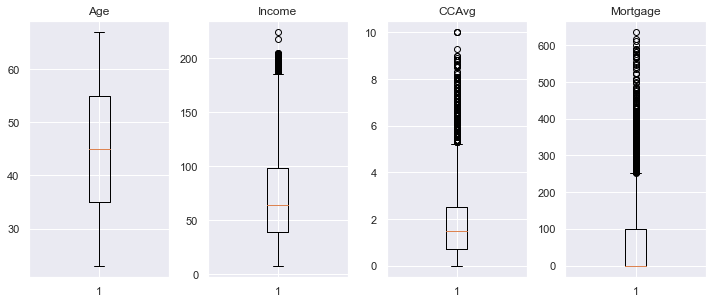

In [229]:
plt.figure(figsize=(10,20))

for i, variable in enumerate(num1):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

Age has no outliers. Outliers from Income, CCAvg and Mortgage are important for model building.

#### STEP 6 : VARIABLE SCALING
For standardizing continuous features.


In [238]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [244]:
dfForScal = pd.DataFrame(df)

In [246]:
std = StandardScaler()

col_names = list(dfForScal.columns)
col_names.remove("Personal_Loan")



In [247]:
scaled = std.fit_transform(dfForScal[col_names])     # Standardize the columns to get them on the same scale
scaled = pd.DataFrame(scaled, columns=col_names)

FinalDf = pd.concat([scaled, df['Personal_Loan']], axis=1)

FinalDf.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Personal_Loan
0,-1.774417,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314,0
1,-0.029524,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314,0
2,-0.552992,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314,0
3,-0.901970,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314,0
4,-0.901970,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,1.549632,0


Scaling Complete

## Model Building
### 1) Logistic Regression
<b> Logistic Regression Model Building to identify the potential customers who have a higher probability of purchasing the loan. </b>

#### STEP 1 : IMPORTING LIBRARIES

In [277]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

#### STEP 2 : TRUE AND FALSE RATIO FOR OUTCOME VARIABLE

In [255]:
n_true = len(FinalDf.loc[FinalDf['Personal_Loan']==True])
n_false = len(FinalDf.loc[FinalDf['Personal_Loan']==False])

In [262]:
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 480 (9.60%)
Number of false cases: 4520 (90.40%)


So we have 9.60% people in current data set who have purcahsed a personal loan and rest of 90.40% who haven't.

#### STEP 3 : SPLITTING DATA FOR TRAINING AND TESTING

In [264]:
from sklearn.model_selection import train_test_split

X = FinalDf.drop('Personal_Loan',axis=1)     # Independent Variables
Y = FinalDf['Personal_Loan']   # Dependent Variable - Target Variable

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
1334,0.144966,-0.842384,-0.345432,-0.365061,-1.049078,-0.555524,-0.341423,-0.25354,0.821951,-0.645314
4768,-0.640236,-0.755483,-1.216855,0.035515,0.141703,-0.555524,-0.341423,-0.25354,0.821951,-0.645314
65,1.191902,1.243252,-1.216855,1.065567,-1.049078,-0.555524,-0.341423,-0.25354,0.821951,1.549632
177,-1.425438,-0.190623,1.397414,-0.078935,0.141703,1.843604,-0.341423,-0.25354,-1.216618,-0.645314
4489,-0.552992,-1.146539,0.525991,-0.994537,0.141703,-0.555524,-0.341423,-0.25354,0.821951,-0.645314


In [265]:
#Split of Train and Test Data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(FinalDf.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(FinalDf.index)) * 100))

70.00% data is in training set
30.00% data is in test set


#### STEP 4 : TRUE AND FALSE RATIO FOR SPLIT DATA

In [266]:
print("Original Loan True Values    : {0} ({1:0.2f}%)".format(len(FinalDf.loc[FinalDf['Personal_Loan'] == 1]), (len(FinalDf.loc[FinalDf['Personal_Loan'] == 1])/len(FinalDf.index)) * 100))
print("Original Loan False Values   : {0} ({1:0.2f}%)".format(len(FinalDf.loc[FinalDf['Personal_Loan'] == 0]), (len(FinalDf.loc[FinalDf['Personal_Loan'] == 0])/len(FinalDf.index)) * 100))
print("")
print("Training Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Loan True Values    : 480 (9.60%)
Original Loan False Values   : 4520 (90.40%)

Training Loan True Values    : 331 (9.46%)
Training Loan False Values   : 3169 (90.54%)

Test Loan True Values        : 149 (9.93%)
Test Loan False Values       : 1351 (90.07%)



#### STEP 5 : LOGISTIC REGRESSION

In [267]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.050943  2.313241  0.780556  0.294911  1.345962  0.077304 -0.341246   

          7         8         9  intercept  
0  0.872282 -0.286347 -0.498506   -4.57044  


Text(39.5, 0.5, 'PREDICTED')

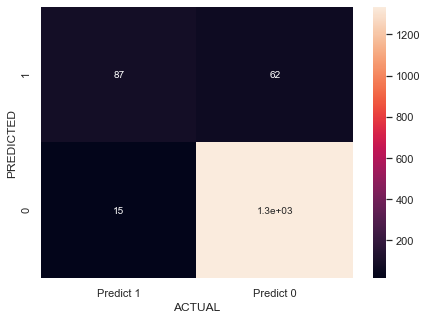

In [274]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.xlabel("ACTUAL")
plt.ylabel("PREDICTED")

<b><u> Confusion Matrix </u></b>

True Positives (TP): we correctly predicted that they will take a loan - <b>87</b>

True Negatives (TN): we correctly predicted that they will not take a loan - <b>1336</b>

<i>Falsely predict positive : Type I error</i>   
False Positives (FP): we incorrectly predicted that they will take a loan - <b>62</b>  


<i>Falsely predict negative : Type II error</i>   
False Negatives (FN): we incorrectly predicted that they will not take a loan - <b>15</b>  


<b><u> Model Statistics / Feature Importance</u></b>

1) <u>INTERCEPT</u>

In [385]:
print("Intercept of the Logistic Regression Model:", model.intercept_) 

Intercept of the Logistic Regression Model: [-4.57044028]


2) <u>COEFFICIENTS OR SLOPE VALUE</u><br>
In logistic regression, the size of the coefficient for each independent variable gives you the size of the effect that variable is having on your dependent variable, and the sign on the coefficient (positive or negative) gives you the direction of the effect. In regression with multiple independent variables, the coefficient tells you how much the dependent variable is expected to increase (if the coefficient is positive) or decrease (if the coefficient is negative) when that independent variable increases by one, holding all the other independent variables constant. 

In [386]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))

The coefficient for Age is 0.050942699333377625
The coefficient for Income is 2.313240918439292
The coefficient for Family is 0.7805562128793472
The coefficient for CCAvg is 0.2949113203562685
The coefficient for Education is 1.3459617866163749
The coefficient for Mortgage is 0.0773041670492194
The coefficient for Securities_Account is -0.3412458332733951
The coefficient for CD_Account is 0.8722823138948513
The coefficient for Online is -0.28634713403980827
The coefficient for CreditCard is -0.4985059093581391


In [387]:
df_coef_chk = pd.DataFrame(columns = ['Attribute', 'Coef'])
for idx, col_name in enumerate(x_train.columns):
    df_coef_chk = df_coef_chk.append(pd.DataFrame({'Attribute': col_name, 'Coef': model.coef_[0][idx]}, index=[0]), ignore_index=True)


In [388]:

df_coef_chk

,Attribute,Coef
0,Age,0.050943
1,Income,2.313241
2,Family,0.780556
3,CCAvg,0.294911
4,Education,1.345962
5,Mortgage,0.077304
6,Securities_Account,-0.341246
7,CD_Account,0.872282
8,Online,-0.286347
9,CreditCard,-0.498506


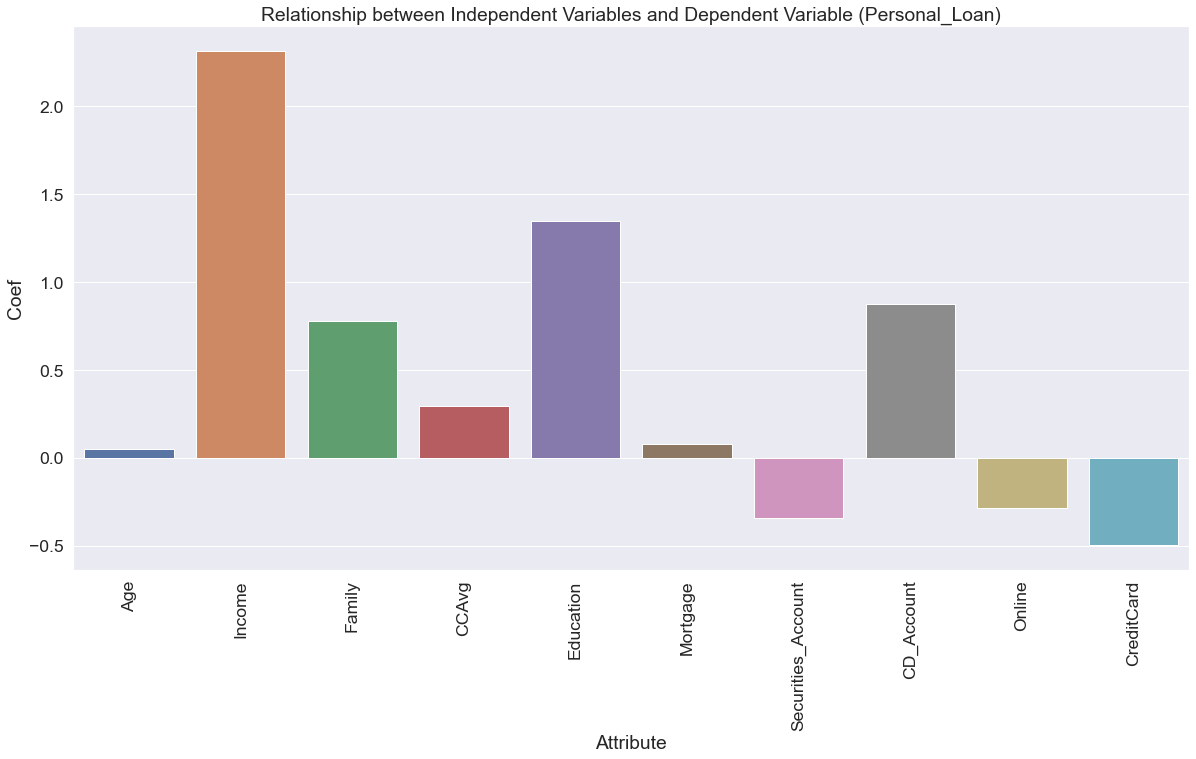

In [390]:
sns.set_palette("rainbow")
sns.set(rc={'figure.figsize':(20,10)},font_scale=1.6)
Coef_Check = sns.barplot(x='Attribute',y='Coef',data = df_coef_chk)
Coef_Check.set_xticklabels(Coef_Check.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.title("Relationship between Independent Variables and Dependent Variable (Personal_Loan)")
plt.show()

As understood from the graph. Few variables have a strong relationship with Personal Loan. This relationship can either be Positive or Negative. The following are listed in Decreasing Order (Strongest To Weakest Relationship)<br>
- <b>SIGNIFICANT POSITIVE EFFECT : </b>Income, Education, CD_Account, Family, CC_Avg, Mortgage, Age <br>
- <b>SIGNIFICANT NEGATIVE EFFECT : </b>Online, Securities_Account, CreditCard<br> 

#### STEP 6 : MODEL PERFORMANCE EVALUATION

<b><u>Accuracy</u></b>

In [289]:
#Accuracy
model_score = model.score(x_test, y_test)
print(model_score)

0.9486666666666667


<b><u>Performance Measures</u></b>

Precision and Recall Values are more accurate performance metrics as they point out the flaws in the model and the direction of improvement. <br><br>
<i>Recall : Out of all customers that purchased the loan, How many were identified correctly?  
Precision: Out of all positive predictions, How many were idenitified correctly?  </i><br><br>
<b>Describe the model better as they provides a better understanding of accuracy</b>

In [314]:
ypred = model.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.85      0.58      0.69       149

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.95      0.95      0.94      1500



##### Observations
f1-score although lower than accuracy; is still a decent score. It gives an idea as to the precision and recall values. 

<b><i>Training Set Values</i></b><br>
<b>RECALL = 58%</b><br>
Out of all the customers who would actually buy the loan, 58% were correctly predicted to be positive (would buy the personal loan). This means that the  bank is missing on 42% of potential customers resulting in losses and additional costs for marketing to that customer base. <br>

<b>PRECISION = 85%</b><br>
85% of precision value means out of all positively predicted customers (who would buy the personal loan) 85% were correctly predicted which is a good score. 



#### STEP 7 : MODEL PERFORMANCE IMPROVEMENT
Using MinMaxScaler()

In [297]:
# Let us scale train as well as test data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
std2 = MinMaxScaler()

col_names = list(dfForScal.columns)
col_names.remove("Personal_Loan")

scaled2 = std2.fit_transform(dfForScal[col_names])  
scaled2 = pd.DataFrame(scaled2, columns=col_names)

FinalDf2 = pd.concat([scaled2, df['Personal_Loan']], axis=1)

FinalDf2.head()

#x_train_scaled = scaler2.fit_transform(x_train)
#x_test_scaled = scaler2.fit_transform(x_test)


,Age,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Personal_Loan
0,0.045455,0.189815,1.000000,0.16,0.0,0.0,1.0,0.0,0.0,0.0,0
1,0.500000,0.120370,0.666667,0.15,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.363636,0.013889,0.000000,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.272727,0.425926,0.000000,0.27,0.5,0.0,0.0,0.0,0.0,0.0,0
4,0.272727,0.171296,1.000000,0.10,0.5,0.0,0.0,0.0,0.0,1.0,0


In [298]:
X2 = FinalDf2.drop('Personal_Loan',axis=1)     # Independent Variables
Y2 = FinalDf2['Personal_Loan']   # Dependent Variable - Target Variable

x2_train, x2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=1)
# 1 is just any random seed number

x2_train.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
1334,0.545455,0.125000,0.333333,0.13,0.0,0.000000,0.0,0.0,1.0,0.0
4768,0.340909,0.143519,0.000000,0.20,0.5,0.000000,0.0,0.0,1.0,0.0
65,0.818182,0.569444,0.000000,0.38,0.0,0.000000,0.0,0.0,1.0,1.0
177,0.136364,0.263889,1.000000,0.18,0.5,0.384252,0.0,0.0,0.0,0.0
4489,0.363636,0.060185,0.666667,0.02,0.5,0.000000,0.0,0.0,1.0,0.0


In [299]:
# Fit the model on train
model2 = LogisticRegression(solver="liblinear")
model2.fit(x2_train, y2_train)
#predict on test
y2_predict = model2.predict(x2_test)


coef_df2 = pd.DataFrame(model2.coef_)
coef_df2['intercept'] = model2.intercept_
print(coef_df2)

          0         1         2         3         4         5         6  \
0 -0.250352  7.632617  1.356244  1.784626  2.295287  0.462629 -0.947366   

         7         8         9  intercept  
0  3.09015 -0.559661 -0.972039  -7.437135  


Text(39.5, 0.5, 'PREDICTED')

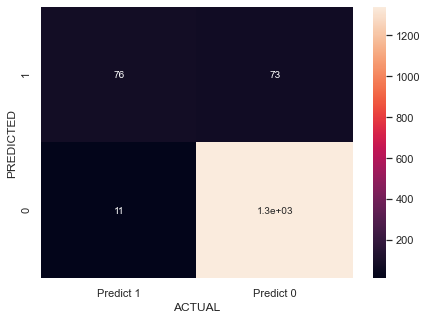

In [300]:
cm2=metrics.confusion_matrix(y2_test, y2_predict, labels=[1, 0])

df_cm2 = pd.DataFrame(cm2, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm2, annot=True)
plt.xlabel("ACTUAL")
plt.ylabel("PREDICTED")

In [301]:
#Accuracy
model_score2 = model2.score(x2_test, y2_test)
print(model_score2)

0.944


In [302]:
ypred2 = model2.predict(x2_test)
print(classification_report(y2_test,ypred2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.87      0.51      0.64       149

    accuracy                           0.94      1500
   macro avg       0.91      0.75      0.81      1500
weighted avg       0.94      0.94      0.94      1500



##### Observations
f1-score although lower than accuracy; is still a decent score. It gives an idea as to the precision and recall values. 

<b><i>Training Set Values</i></b><br>
<b>RECALL = 51%</b><br>
<b>PRECISION = 87%</b><br>


As we can see, although the precision score improved by 2%, the recall fell by 7%. 
We can safely say that the previous model (StandardScaler) had the <b>best model performance</b>.


### 2) Decision Tree
<b> Decision Tree Model Building </b>

#### STEP 1 : IMPORTING LIBRARIES

In [303]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#### STEP 2 : SPLITTING DATA FOR TRAINING AND TESTING

This step has already been done before for Logistic Regression Model Building and therefore we will use the the same 70 : 30 split that was used in the previous model.

#### STEP 3 : BUILDING DECISION TREE MODEL

In [306]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

#### STEP 4 : VISUALIZING THE DECISION TREE MODEL

In [350]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


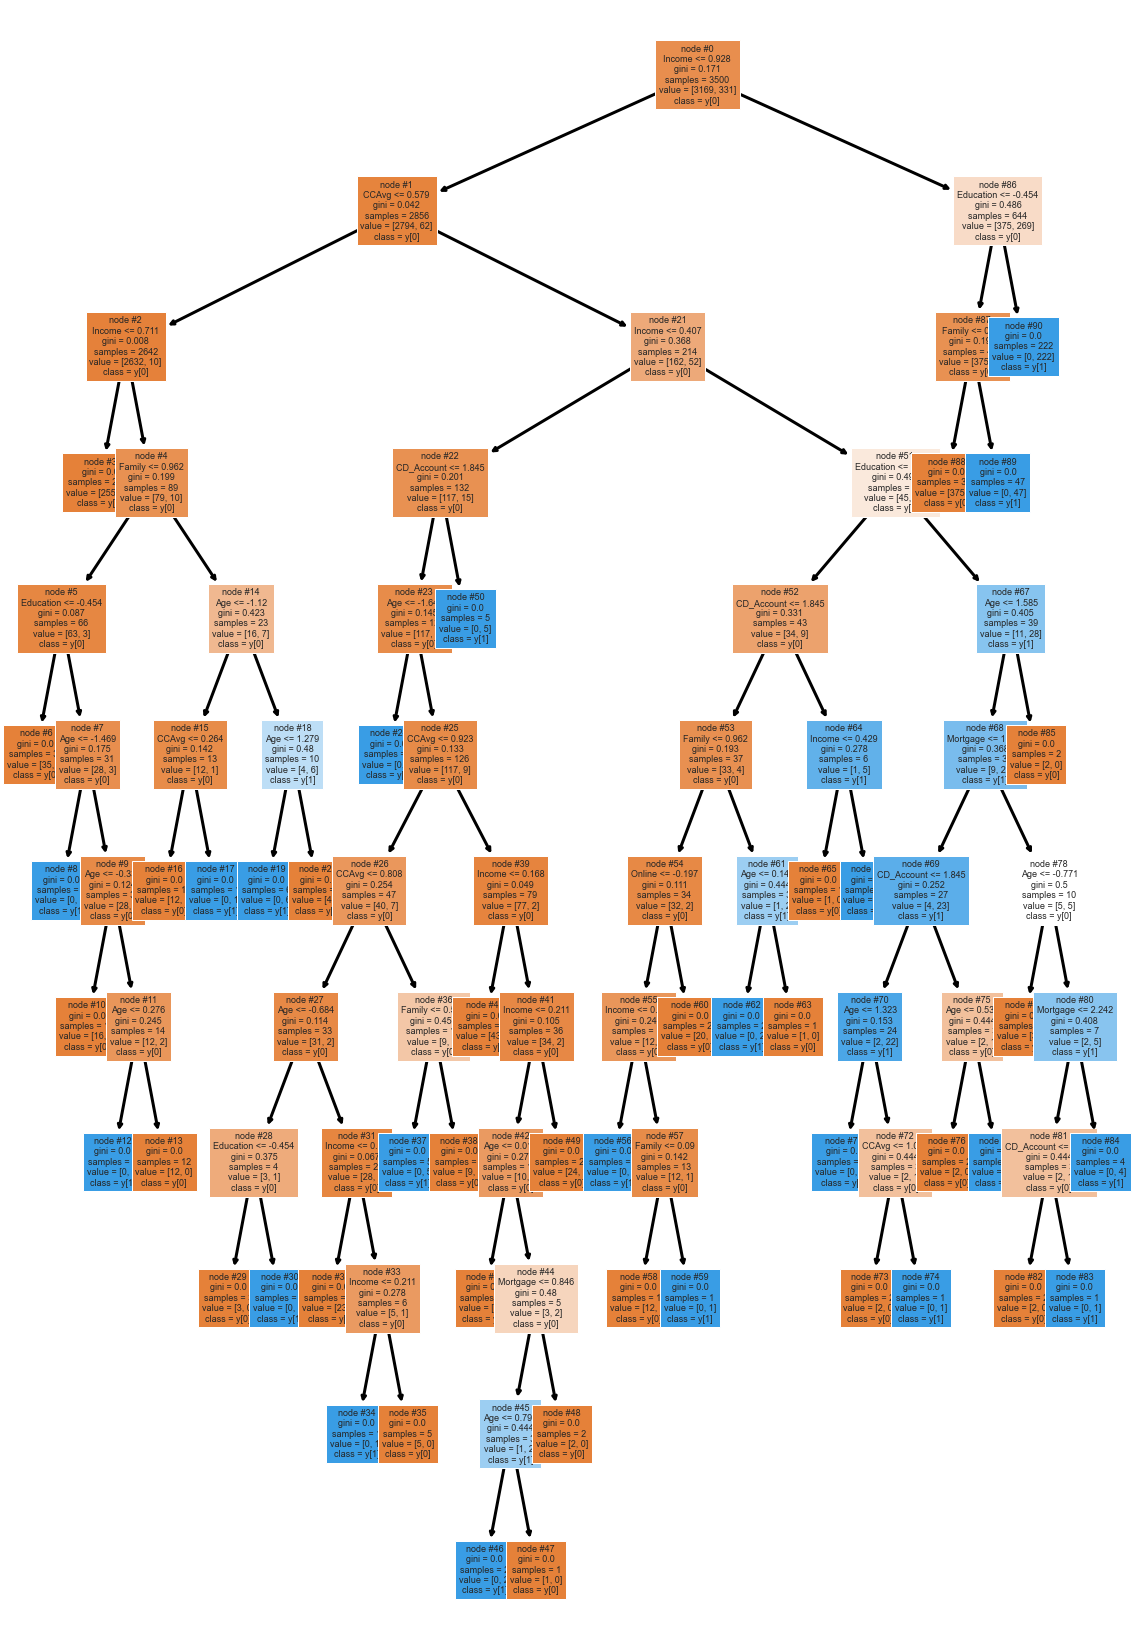

In [352]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
plt.show()

In [355]:
#Text Report Version
print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- Income <= 0.93
|   |--- CCAvg <= 0.58
|   |   |--- Income <= 0.71
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  0.71
|   |   |   |--- Family <= 0.96
|   |   |   |   |--- Education <= -0.45
|   |   |   |   |   |--- weights: [35.00, 0.00] class: 0
|   |   |   |   |--- Education >  -0.45
|   |   |   |   |   |--- Age <= -1.47
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  -1.47
|   |   |   |   |   |   |--- Age <= -0.33
|   |   |   |   |   |   |   |--- weights: [16.00, 0.00] class: 0
|   |   |   |   |   |   |--- Age >  -0.33
|   |   |   |   |   |   |   |--- Age <= 0.28
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |--- Age >  0.28
|   |   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |--- Family >  0.96
|   |   |   |   |--- Age <= -1.12
|   |   |   |   |   |--- CCAvg <= 0.26
|   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|  

#### STEP 5 : SCORING THE DECISION TREE MODEL / MODEL PERFORMANCE EVALUATION

<b><u>Accuracy</u></b>

In [307]:
print("Accuracy on training set : ",dTree.score(x_train, y_train))
print("Accuracy on test set : ",dTree.score(x_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9773333333333334


<b><u>Confusion Matrix</u></b>

In [347]:
def make_confusion_matrix(Dmodel,y_actual,labels=[0, 1]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict3 = Dmodel.predict(x_test)
    cm3=metrics.confusion_matrix(  y_predict3,y_actual, labels=[1, 0])
    df_cm3 = pd.DataFrame(cm3, columns = [i for i in ["Actual - Yes","Actual - No"]],
                         index = [i for i in ['Predicted - Yes','Predicted - No']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm3.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm3.flatten()/np.sum(cm3)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm3, annot=labels,fmt='')
    plt.ylabel('PREDICTED')
    plt.xlabel('ACTUAL')

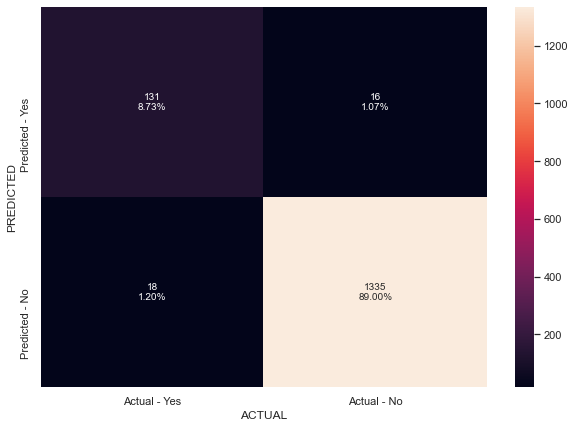

In [348]:
make_confusion_matrix(dTree,y_test) 


True Positives (TP): we correctly predicted that they will take a loan - <b>131</b>

True Negatives (TN): we correctly predicted that they will not take a loan - <b>1335</b>

<i>Falsely predict positive : Type I error</i>   
False Positives (FP): we incorrectly predicted that they will take a loan - <b>16</b>  


<i>Falsely predict negative : Type II error</i>   
False Negatives (FN): we incorrectly predicted that they will not take a loan - <b>18</b>  


<b><u>Performance Measures</u></b>

In [349]:
y_predict3 = dTree.predict(x_test)
print(classification_report(y_test,y_predict3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.89      0.88      0.89       149

    accuracy                           0.98      1500
   macro avg       0.94      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



##### Observations
f1-score although lower than accuracy; is still a decent score. It gives an idea as to the precision and recall values.

<b><i>Training Set Values</i></b><br>
<u>RECALL = 88%</u><br>
Out of all the customers who would actually buy the loan, 88% were correctly predicted to be positive (would buy the personal loan). This means that the  bank is missing on 12% of potential customers resulting in losses and additional costs for marketing to that customer base. <br>

<u>PRECISION = 89%</u><br>
89% precision value means out of all positively predicted customers (who would buy the personal loan) 89% were correctly predicted which is a good score. <br><br>

The Recall and Precision values are very high showing that the Decision tree Classifier is an excellent model. 



<b><u>Feature Importance</u></b><br>
The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance

In [377]:
FeatImp = pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False)

FeatImp

,Imp
Education,0.403968
Income,0.307401
Family,0.160377
CCAvg,0.047488
Age,0.044933
CD_Account,0.027936
Mortgage,0.007336
Online,0.000561
Securities_Account,0.000000
CreditCard,0.000000


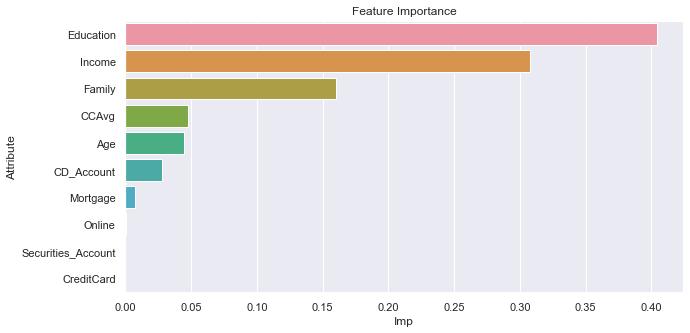

In [442]:
sns.set_palette("rainbow")
FeatImpPlt = sns.barplot(y=index,x='Imp',data = FeatImp)

plt.title("Feature Importance")
plt.show()

From this graph, we can see that Education has the highest feature importance followed by Income, Family, CCAvg, Age, CD_Account and Mortgage. <br>
Online, Securities_Account and CreditCard hold negligible feature importance 

##### Observations
As we can see this model is very complex and difficult to understand. We can also say that this model tends to overfit. <br>
To avoid this, we can PRUNE the decision tree to avoid overfitting and also for ease of understanding. 


#### STEP 6 : MODEL PERFORMANCE IMPROVEMENT


<u>METHOD 1</u> : <u>MAX DEPTH</u>

In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits and it captures more information about the data and this is one of the root causes of overfitting. <br>
Let's try Limiting the max_depth of tree to 3

In [392]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

<b><u>Confusion Matrix</u></b>

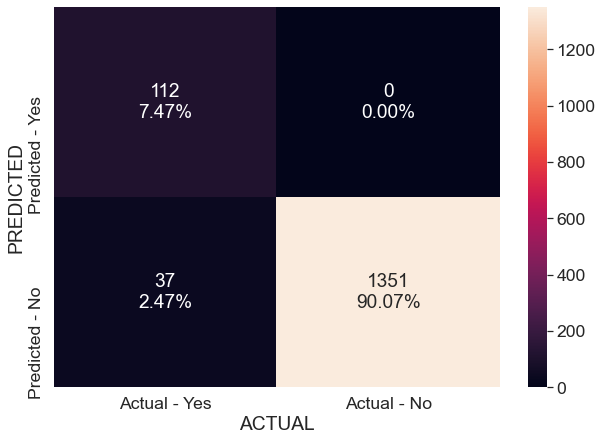

In [393]:
make_confusion_matrix(dTree1, y_test)


True Positives (TP): we correctly predicted that they will take a loan - <b>112</b>

True Negatives (TN): we correctly predicted that they will not take a loan - <b>1351</b>

<i>Falsely predict positive : Type I error</i>   
False Positives (FP): we incorrectly predicted that they will take a loan - <b>0</b>  


<i>Falsely predict negative : Type II error</i>   
False Negatives (FN): we incorrectly predicted that they will not take a loan - <b>37</b>  


<b><u>Accuracy</u></b>

In [396]:
print("Accuracy on training set : ",dTree1.score(x_train, y_train))
print("Accuracy on test set : ",dTree1.score(x_test, y_test))

Accuracy on training set :  0.9822857142857143
Accuracy on test set :  0.9753333333333334


<b><u>Performance Measures</u></b>

In [397]:
y_predict4 = dTree1.predict(x_test)
print(classification_report(y_test,y_predict4))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1351
           1       1.00      0.75      0.86       149

    accuracy                           0.98      1500
   macro avg       0.99      0.88      0.92      1500
weighted avg       0.98      0.98      0.97      1500



##### Observations
f1-score although lower than accuracy; is still a decent score. It gives an idea as to the precision and recall values. 

<b><i>Training Set Values</i></b><br>
<u>RECALL = 75%</u><br>
Out of all the customers who would actually buy the loan, 75% were correctly predicted to be positive (would buy the personal loan). This means that the  bank is missing on 25% of potential customers resulting in losses and additional costs for marketing to that customer base. <br>

<u>PRECISION = 100%</u><br>
100% precision value means out of all positively predicted customers (who would buy the personal loan) 100% were correctly predicted which is BEST POSSIBLE VALUE. <br><br>

The Recall and Precision values are very high showing that the Decision tree Classifier is an excellent model. 

<b>We now have a model that doesn't overfit and has the best possible precision value.</b> 

### Visualizing Decision Tree

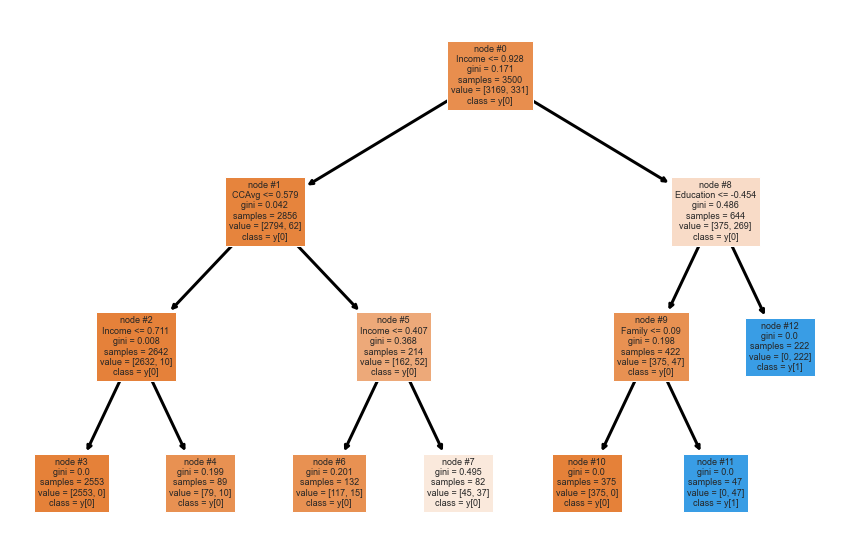

In [399]:
plt.figure(figsize=(15,10))
out2 = tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out2:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
plt.show()

In [400]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

|--- Income <= 0.93
|   |--- CCAvg <= 0.58
|   |   |--- Income <= 0.71
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  0.71
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  0.58
|   |   |--- Income <= 0.41
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  0.41
|   |   |   |--- weights: [45.00, 37.00] class: 0
|--- Income >  0.93
|   |--- Education <= -0.45
|   |   |--- Family <= 0.09
|   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |--- Family >  0.09
|   |   |   |--- weights: [0.00, 47.00] class: 1
|   |--- Education >  -0.45
|   |   |--- weights: [0.00, 222.00] class: 1



The tree is much more readable and understandable now, Although the recall value has fallen by quite a bit. 

<b><u>Feature Importance</u></b><br>
The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance

In [401]:
FeatImp2 = pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False)
FeatImp2

,Imp
Education,0.446593
Income,0.346997
Family,0.162372
CCAvg,0.044038
Age,0.000000
Mortgage,0.000000
Securities_Account,0.000000
CD_Account,0.000000
Online,0.000000
CreditCard,0.000000


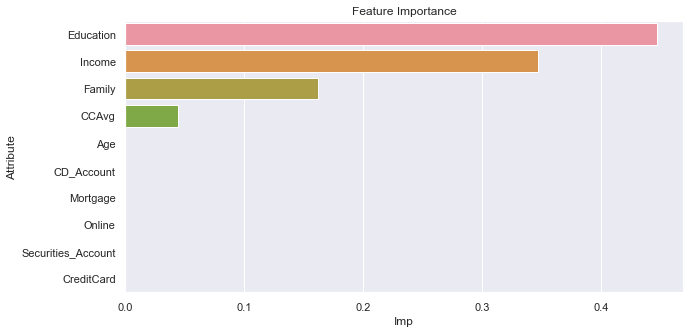

In [443]:
sns.set_palette("rainbow")
FeatImpPlt2 = sns.barplot(y=index,x='Imp',data = FeatImp2)

plt.title("Feature Importance")
plt.show()

From this graph, we can see that Education has the highest feature importance followed by Income, Family and CCAvg. <br>
Age, CD_Account, MortgageOnline, Securities_Account and CreditCard hold negligible feature importance. Which is a huge change from that in the previous model. <br><br>
That's why we will go for pre pruning using grid search, maybe setting max_depth to 3 is not good enough<br>

It is bad to have a very low depth because your model will underfit
Let's see how to find the best values<br>

<u>METHOD 2</u> : <u>GRID SEARCH USING HYPERPARAMETER</u><br>
Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [403]:
from sklearn.model_selection import GridSearchCV

In [404]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

<b><u>Confusion Matrix</u></b>

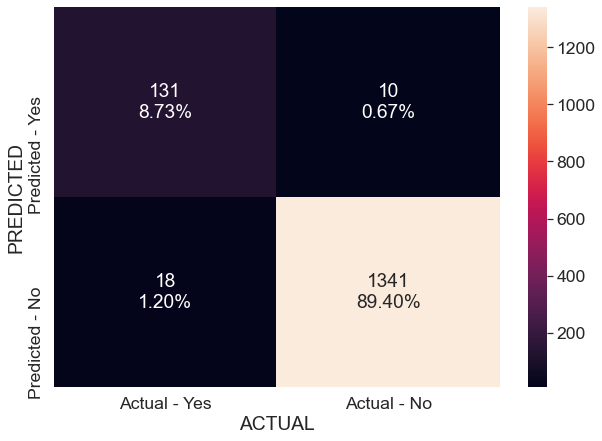

In [405]:
make_confusion_matrix(estimator, y_test)


True Positives (TP): we correctly predicted that they will take a loan - <b>131</b>

True Negatives (TN): we correctly predicted that they will not take a loan - <b>1341</b>

<i>Falsely predict positive : Type I error</i>   
False Positives (FP): we incorrectly predicted that they will take a loan - <b>10</b>  


<i>Falsely predict negative : Type II error</i>   
False Negatives (FN): we incorrectly predicted that they will not take a loan - <b>18</b>  


<b><u>Accuracy</u></b>

In [409]:
print("Accuracy on training set : ",estimator.score(x_train, y_train))
print("Accuracy on test set : ",estimator.score(x_test, y_test))

Accuracy on training set :  0.9897142857142858
Accuracy on test set :  0.9813333333333333


<b><u>Performance Measures</u></b>

In [410]:
y_predict5 = estimator.predict(x_test)
print(classification_report(y_test,y_predict5))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.93      0.88      0.90       149

    accuracy                           0.98      1500
   macro avg       0.96      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



##### Observations
f1-score although lower than accuracy; is still a decent score. It gives an idea as to the precision and recall values. 

<b><i>Training Set Values</i></b><br>
<u>RECALL = 88%</u><br>
Out of all the customers who would actually buy the loan, 88% were correctly predicted to be positive (would buy the personal loan). This means that the  bank is missing on 12% of potential customers resulting in losses and additional costs for marketing to that customer base. <br>

<u>PRECISION = 93%</u><br>
93% precision value means out of all positively predicted customers (who would buy the personal loan) 93% were correctly predicted which is an excellent value <br><br>

The Recall and Precision values are very high showing that the Decision tree Classifier with Hyperparameter tuning using gridsearch is an excellent model. 

<b>We not have a model that doesn't overfit and have great recall and precision values</b> 

### Visualizing Decision Tree

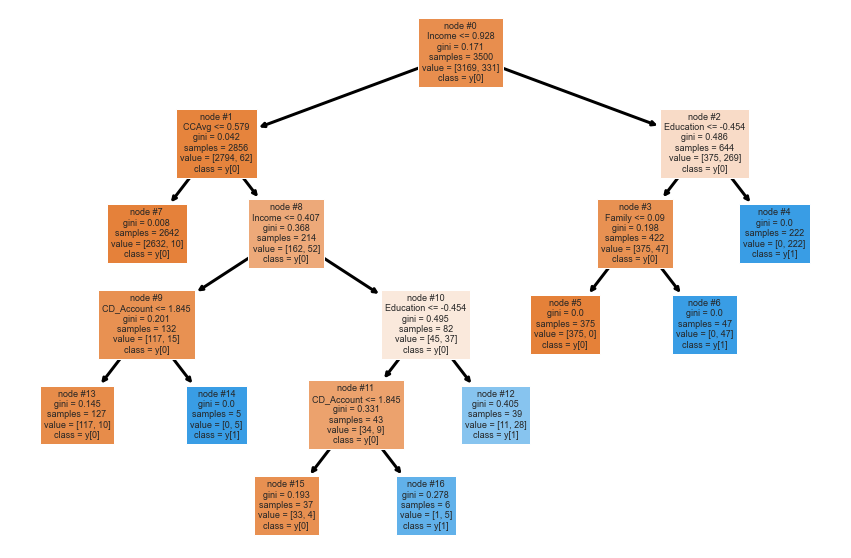

In [411]:
plt.figure(figsize=(15,10))
out3 = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out3:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
plt.show()

In [412]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Income <= 0.93
|   |--- CCAvg <= 0.58
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  0.58
|   |   |--- Income <= 0.41
|   |   |   |--- CD_Account <= 1.85
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  1.85
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  0.41
|   |   |   |--- Education <= -0.45
|   |   |   |   |--- CD_Account <= 1.85
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  1.85
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|   |   |   |--- Education >  -0.45
|   |   |   |   |--- weights: [11.00, 28.00] class: 1
|--- Income >  0.93
|   |--- Education <= -0.45
|   |   |--- Family <= 0.09
|   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |--- Family >  0.09
|   |   |   |--- weights: [0.00, 47.00] class: 1
|   |--- Education >  -0.45
|   |   |--- weights: [0.00, 222.00] class: 1



The tree is much more readable and understandable now. We also have good precision and recall values.

<b><u>Feature Importance</u></b><br>
The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance

In [415]:
FeatImp3 = pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False)
FeatImp3

,Imp
Education,0.447999
Income,0.328713
Family,0.155711
CCAvg,0.042231
CD_Account,0.025345
Age,0.000000
Mortgage,0.000000
Securities_Account,0.000000
Online,0.000000
CreditCard,0.000000


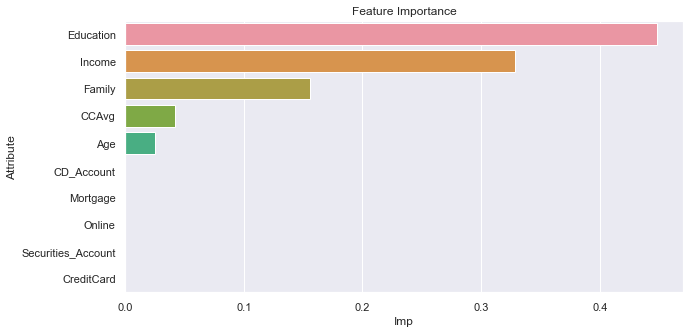

In [444]:
sns.set_palette("rainbow")
FeatImpPlt3 = sns.barplot(y=index,x='Imp',data = FeatImp3)

plt.title("Feature Importance")
plt.show()

From this graph, we can see that Education has the highest feature importance followed by Income, Family, CCAvg and Age <br>
CD_Account, MortgageOnline, Securities_Account and CreditCard hold negligible feature importance. Which is a huge change from the original model. <br>
Age now has more importance than in the model using max_depth pruning.<br>


## Actionable Insights & Recommendations

### 1) Comparing all models

In [431]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression Model','Initial decision tree model','Decision tree(Max Depth)','Decision tree(Hyperparameter Tuning)'], 'Train_Recall':[0.99,0.99,1,0.99], 'Test_Recall':[0.58,0.88,0.75,0.88],'Train_Precision':[0.96,0.99,0.97,0.99], 'Test_Precision':[0.85,0.89,1,0.93]}) 
comparison_frame


,Model,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression Model,0.99,0.58,0.96,0.85
1,Initial decision tree model,0.99,0.88,0.99,0.89
2,Decision tree(Max Depth),1.00,0.75,0.97,1.00
3,Decision tree(Hyperparameter Tuning),0.99,0.88,0.99,0.93


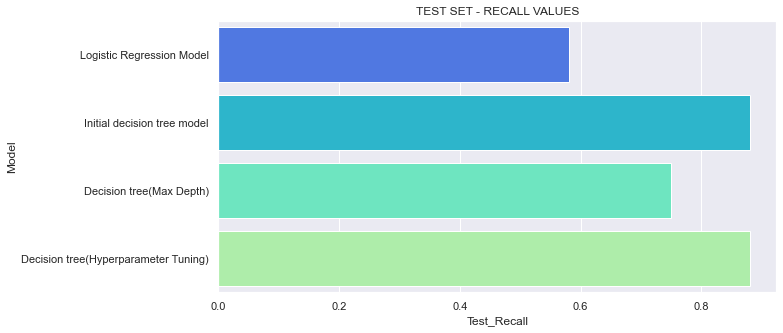

In [445]:
sns.set(rc={'figure.figsize':(10,5)},font_scale=1)
sns.set_palette("rainbow")
graph1 = sns.barplot(x='Test_Recall',y='Model',data=comparison_frame)

plt.title("TEST SET - RECALL VALUES")
plt.show()

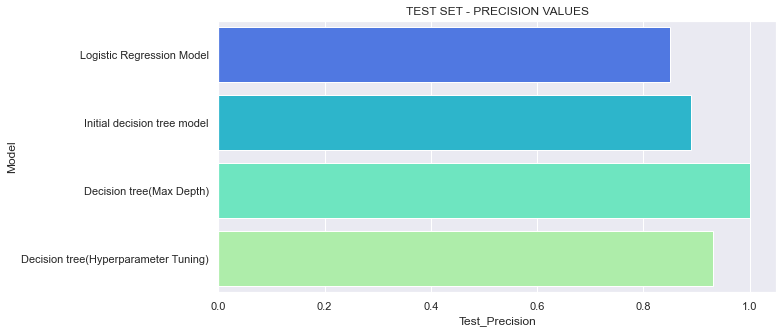

In [447]:
sns.set(rc={'figure.figsize':(10,5)},font_scale=1)
sns.set_palette("rainbow")
graph2 = sns.barplot(x='Test_Precision',y='Model',data=comparison_frame)

plt.title("TEST SET - PRECISION VALUES")
plt.show()


#### Observations
With this table we can conclude that <b>Decision tree with Hyperparameter Tuning</b> is the model with the best possible Precision and Accuracy Values.

### 2) Key Takeaways for the Business.
<b> These are a few points the business can focus on to improve their chances of customers purchasing a personal loan. </b>
- Since Education is a very important feature across all models, the business should focus on the different levels of education. A special loan package can be crafted targetting each level of education based on how inclined they are to purchase the loan and their ability to pay it back.
- Since higher income customers are more likely to buy a loan, special interest rates can be applied to them which would be slightly higher that normal rates as they would hold the capacity to pay them back whereas the lower income customers can have lower interest rates to encourage them to purchase loans. 
- Personalized Loans based on different needs like Home, Car, Travel, etc. 
- Loan Packages targetting families of different sizes with specific attention drawn to loans for children's education, etc. for families of bigger sizes and with children. 
- Customers with higher Credit Card Spending Averages can be targetted by offering them cashbacks on their credit cards purchases based on whether or not they have Securities Account, CD Account or Credit Cards with the bank. 
- Those with lower spending avergae can also be targeted by offering them credit cards with the purchase of loans which provide specific benefits based on the retail stores they are used in. 
- Identifying the Age Demographic more likely to purchase loans and creating specific marketing campaigns that would draw their attention. 